In [1]:
using Plots, DifferentialEquations, SpecialFunctions

In [2]:
function tracywidomODE!(du,u,p,t)
    du .= [u[2], t*u[1] + 2*u[1]^3, u[4], u[1]^2]
end

tracywidomODE! (generic function with 1 method)

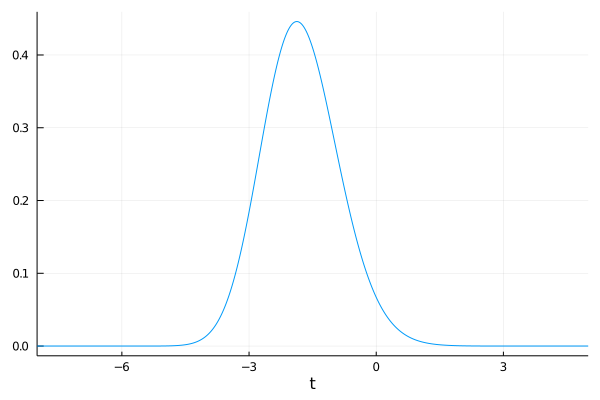

In [3]:
t0,tn = 5.0,-8.0
u0 = [airy(t0), airy(1, t0), 0, airy(t0)^2]
prob = ODEProblem(tracywidomODE!,u0,(t0,tn))
sol = solve(prob,Tsit5(), reltol=1e-12, abstol=1e-12)
f(t,I,I′) = (t, -I′*exp(-I))
plot(sol, vars=(f,0,3,4), flip=false, legend=false)

In [4]:
TracyWidomPDF_via_ODE(t) = f(t, sol(t)[[3,4]]...)[2]

TracyWidomPDF_via_ODE (generic function with 1 method)

In [5]:
using SpecialFunctions, FastGaussQuadrature, LinearAlgebra, ForwardDiff

In [6]:
airy_kernel(x, y) = x==y ? (airyaiprime(x))^2 - x * (airyai(x))^2 :
           (airyai(x) * airyaiprime(y) - airyai(y) * airyaiprime(x)) / (x - y)
ϕ(ξ, s) =  s + 10*tan(π*(ξ+1)/4) # Transformation from [-1,1] to (s,∞)
ϕ′(ξ) = (5π/2)*(sec(π*(ξ+1)/4))^2
K(ξ,η,s) = sqrt(ϕ′(ξ) * ϕ′(η)) * airy_kernel(ϕ(ξ,s), ϕ(η,s))

K (generic function with 1 method)

In [17]:
# Tracy widom at s = -2 using "det"
s = 0

function K(s , n=100) 
    nodes,weights = gausslegendre(n)
    Symmetric( K.(nodes',nodes,s) .* (√).(weights) .* (√).(weights'))
end

TracyWidomPDF_via_Fredholm_Det(s) = ForwardDiff.derivative( t->det(I-K(t)),s)

TracyWidomPDF_via_Fredholm_Det (generic function with 1 method)

In [18]:
t = .2
[TracyWidomPDF_via_ODE(t), TracyWidomPDF_via_Fredholm_Det(t) ]


2-element Array{Float64,1}:
 0.045257273558682275
 0.04525728451260699

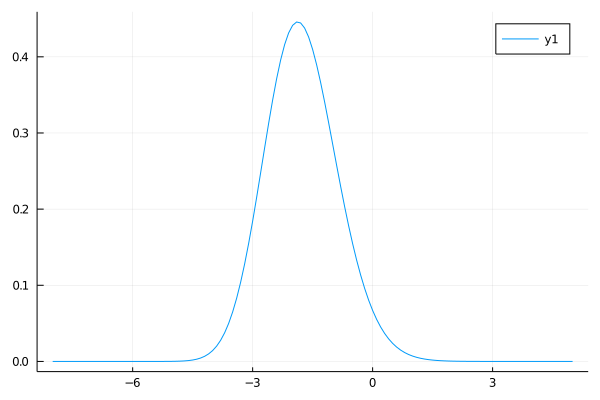

In [20]:
plot( -8:.1:5, TracyWidomPDF_via_Fredholm_Det)